In [1]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading data file
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

#display top of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Display the shape of dataset 
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop('Cabin',inplace=True,axis=1)

<AxesSubplot:xlabel='Age', ylabel='Density'>

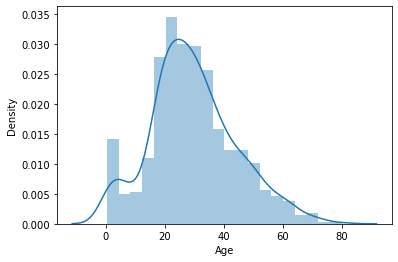

In [7]:
sns.distplot(df['Age'])

In [8]:
#replacing nan values with mean for attribute Age
df['Age']=df['Age'].fillna(np.mean(df['Age']))

#replacing nan values with mode for attribute Embarked
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
#Statistical Summary

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

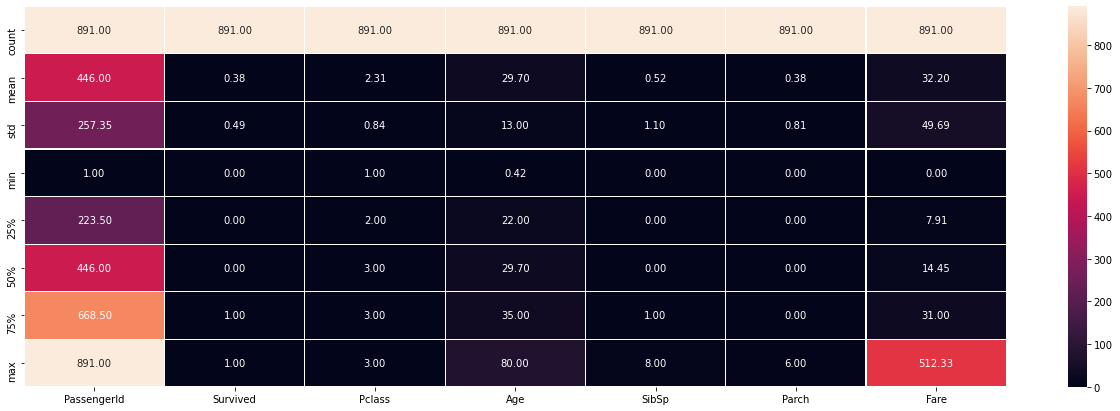

In [11]:
#Visulization plot for summary statistics
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='white',fmt='0.2f')

male      577
female    314
Name: Sex, dtype: int64


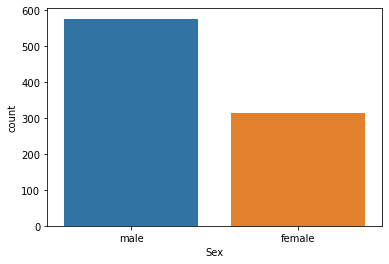

In [12]:
#Data Visulaization of Catagorical features

ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


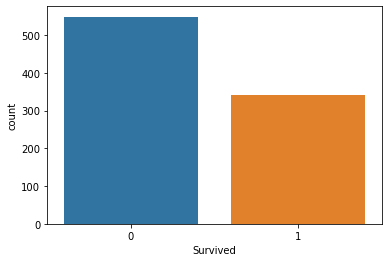

In [13]:
ax=sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


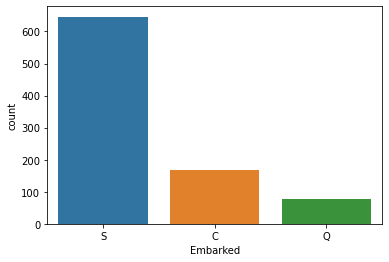

In [14]:
ax=sns.countplot(x='Embarked',data=df)
print(df['Embarked'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


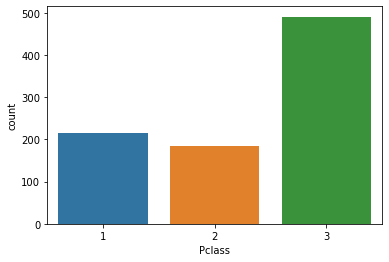

In [15]:
ax=sns.countplot(x='Pclass',data=df)
print(df['Pclass'].value_counts())

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


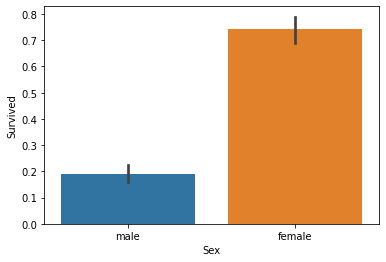

In [16]:
#Visualization of bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=df)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of 1st class passenger survived: 62.96296296296296
Percentage of 2nd class passenger survived: 47.28260869565217
Percentage of 3rd class passenger survived: 24.236252545824847


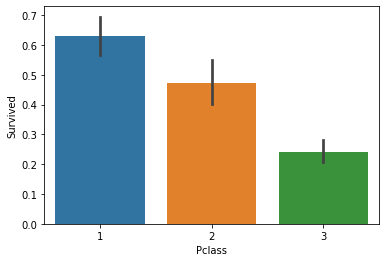

In [17]:
#Visualization of bar plot of survival by Pclass

sns.barplot(x='Pclass',y='Survived',data=df)

print('Percentage of 1st class passenger survived:',df['Survived'][df['Pclass']==1].value_counts(normalize = True)[1]*100)
print('Percentage of 2nd class passenger survived:',df['Survived'][df['Pclass']==2].value_counts(normalize = True)[1]*100)
print('Percentage of 3rd class passenger survived:',df['Survived'][df['Pclass']==3].value_counts(normalize = True)[1]*100)

Percentage of 0 SibSp survived: 34.53947368421053
Percentage of 1 SibSp survived: 53.588516746411486
Percentage of 2 SibSp survived: 46.42857142857143
Percentage of 3 SibSp survived: 25.0
Percentage of 4 SibSp survived: 16.666666666666664


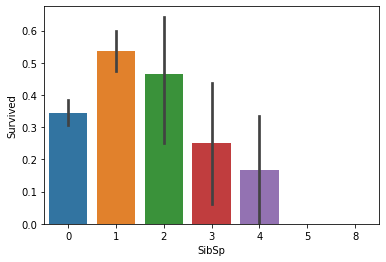

In [18]:
#Visualization of bar plot of survival by SibSp

sns.barplot(x='SibSp',y='Survived',data=df)

print('Percentage of 0 SibSp survived:',df['Survived'][df['SibSp']==0].value_counts(normalize = True)[1]*100)
print('Percentage of 1 SibSp survived:',df['Survived'][df['SibSp']==1].value_counts(normalize = True)[1]*100)
print('Percentage of 2 SibSp survived:',df['Survived'][df['SibSp']==2].value_counts(normalize = True)[1]*100)
print('Percentage of 3 SibSp survived:',df['Survived'][df['SibSp']==3].value_counts(normalize = True)[1]*100)
print('Percentage of 4 SibSp survived:',df['Survived'][df['SibSp']==4].value_counts(normalize = True)[1]*100)

Percentage of 0 parch survived: 34.365781710914455
Percentage of 1 Parch survived: 55.08474576271186
Percentage of 2 Parch survived: 50.0
Percentage of 3 parch survived: 60.0
Percentage of 5 parch survived: 20.0


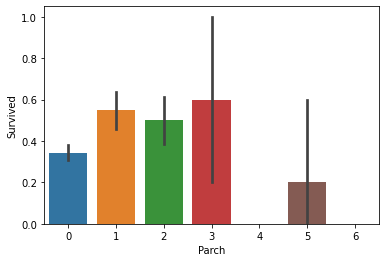

In [19]:
#Visualization of bar plot of survival by Parch

sns.barplot(x='Parch',y='Survived',data=df)

print('Percentage of 0 parch survived:',df['Survived'][df['Parch']==0].value_counts(normalize = True)[1]*100)
print('Percentage of 1 Parch survived:',df['Survived'][df['Parch']==1].value_counts(normalize = True)[1]*100)
print('Percentage of 2 Parch survived:',df['Survived'][df['Parch']==2].value_counts(normalize = True)[1]*100)
print('Percentage of 3 parch survived:',df['Survived'][df['Parch']==3].value_counts(normalize = True)[1]*100)
print('Percentage of 5 parch survived:',df['Survived'][df['Parch']==5].value_counts(normalize = True)[1]*100)

Percentage of Embarked = S survived: 33.90092879256966
Percentage of Embarked = C survived: 55.35714285714286
Percentage of Embarked = Q survived: 38.961038961038966


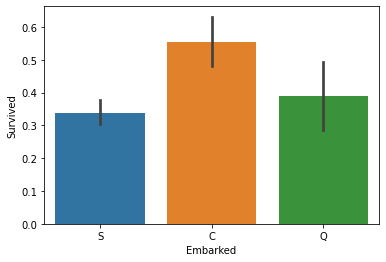

In [20]:
#Visualization of bar plot of survival by Embarked

sns.barplot(x='Embarked',y='Survived',data=df)

print('Percentage of Embarked = S survived:',df['Survived'][df['Embarked']=='S'].value_counts(normalize = True)[1]*100)
print('Percentage of Embarked = C survived:',df['Survived'][df['Embarked']=='C'].value_counts(normalize = True)[1]*100)
print('Percentage of Embarked = Q survived:',df['Survived'][df['Embarked']=='Q'].value_counts(normalize = True)[1]*100)

In [21]:
fig = plt.figure(figsize=(15,5), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_highclass.plot(kind='bar', label='female-highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_lowclass.plot(kind='bar', label='female-low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_lowclass.plot(kind='bar', label='male-low class',color='blue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_highclass.plot(kind='bar', label='male-highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')


In [22]:
#Encoding of DataFrame

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [23]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name           float64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Embarked       float64
dtype: object

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,2.0


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

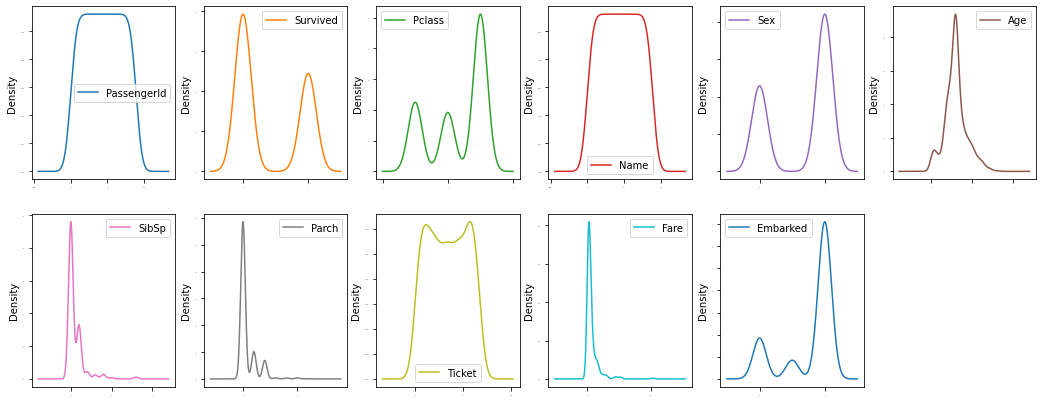

In [25]:
# Density visualisation for all attributes

df.plot(kind='density',layout=(2,6),sharex=False,sharey=False,subplots=True,grid=False,fontsize=1,figsize=(18,7))

In [26]:
# Checking for Correlation 
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.224719


<AxesSubplot:>

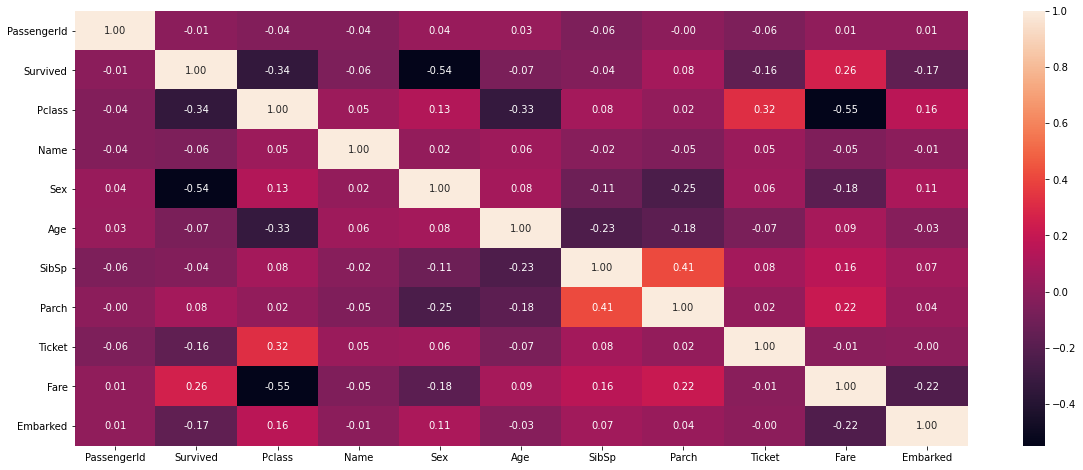

In [27]:
#Visulaization of Correlation
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),linecolor='white',annot=True,fmt='0.2f')

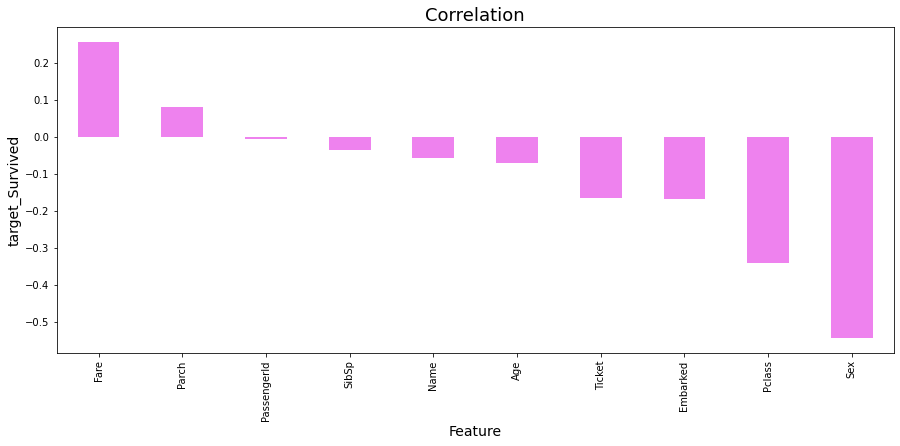

In [28]:
#Visualization of correlation of target variable with other variables
plt.figure(figsize=(15,6))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='violet')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target_Survived',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

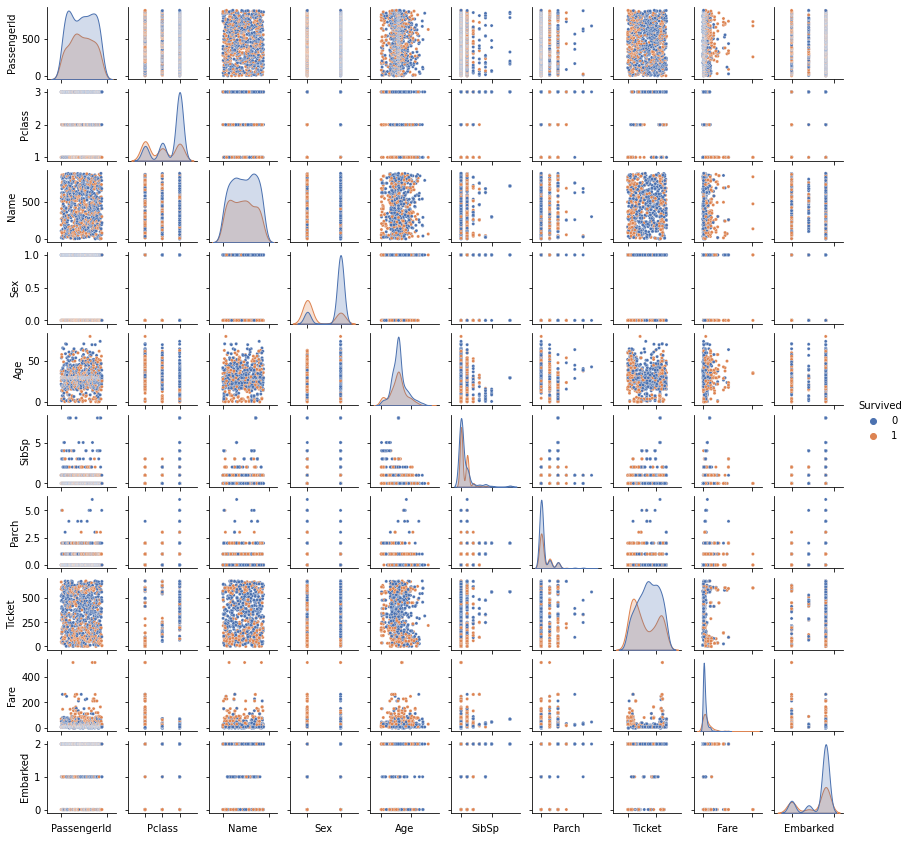

In [29]:
## pair plot

pp = sns.pairplot(df, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

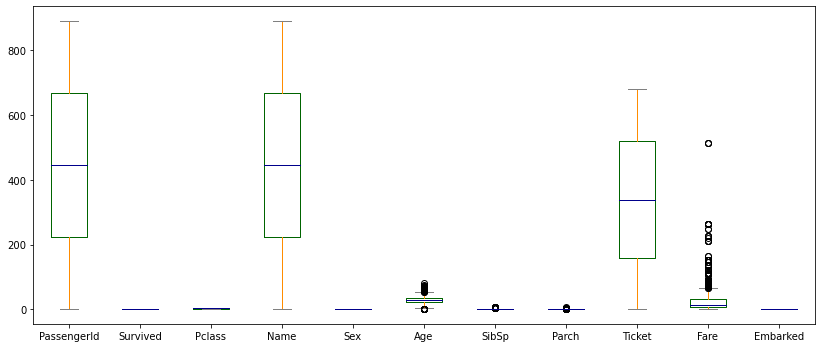

In [30]:
#Checking for Outliers:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df.plot(kind='box', color=color,figsize=(14,7))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [31]:
### Data Cleaning 

## Removing outliers

#Importing zscore from scipy.stats

from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df[(z<3).all(axis=1)] # Threshold value is +/-3

print('Shape of new data set after removing outliers:',new_df.shape)
print('Shape of data set with outliers:',df.shape)

Shape of new data set after removing outliers: (820, 11)
Shape of data set with outliers: (891, 11)


In [32]:
D_t=((891-820)/891)*100
print('Data loss after removing outliers is :',D_t,'%')

Data loss after removing outliers is : 7.968574635241302 %


In [33]:
### Checking for Skewness

new_df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Name           0.010147
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Ticket         0.039240
Fare           2.318761
Embarked      -1.277386
dtype: float64

In [34]:
#Splitting the data inrto train and test

x=new_df.drop(['Survived','PassengerId'],axis=1)
y=new_df['Survived']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [36]:
#Finding out best random best state

maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    LR_Accu=accuracy_score(y_test,pred_test)
    if LR_Accu>maxAccu:
        maxAccu=LR_Accu
        maxRS=i
print('Best Accuracy is : ',maxAccu*100,'on random state :' ,maxRS)

Best Accuracy is :  83.73983739837398 on random state : 43


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)
print('Training set shape: ', x_train.shape, y_train.shape)
print('Testing set shape: ', x_test.shape, y_test.shape)

Training set shape:  (574, 9) (574,)
Testing set shape:  (246, 9) (246,)


In [38]:
###Feature Selection
##Feature Selection is a techinque of finding out the features that contribute the most to our model 
#i.e. the best predictors.

from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [39]:
# Get the two best(k = 2) features using the SelectKBest method
ft = SelectKBest(chi2, k = 2).fit(x_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', x_train.columns)

Score:  [  12.28430489  431.65895385   51.9987957    53.55259712    4.97133284
   23.22373616 1371.14331788 1448.83884217    2.61353239]
Columns:  Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')


In [40]:
ft = SelectKBest(f_classif, k= 2).fit(x_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', x_train.columns)

Score:  [ 44.2801585    3.04857746 218.69888057  10.61332458   4.54148176
  19.06471912  11.30716294  47.94432661   6.65263189]
Columns:  Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')


In [44]:
#Checking for Best Model


from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [45]:
cv_means=[]
cv_std=[]

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[124  30]
 [ 14  78]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       154
           1       0.72      0.85      0.78        92

    accuracy                           0.82       246
   macro avg       0.81      0.83      0.81       246
weighted avg       0.83      0.82      0.82       246

-------------------------------------------------------------------------------------------------------------------
Accuracy score for GaussianNB : 82.11382113821138
-------------------------------------------------------------------------------------------------------------------
cross_val_score for GaussianNB: 77.07317073170732
Standard Deviation: 0.0412836850727092
-

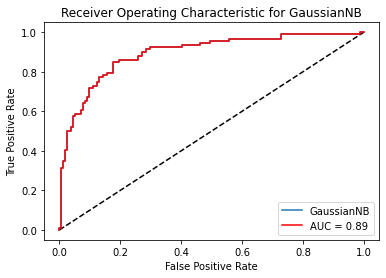

In [46]:
#GaussianNB
GNB=GaussianNB()

GNB.fit(x_train,y_train)
pred_test=GNB.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for GaussianNB :',accuracy_score(y_test,pred_test)*100)
print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

a1=cross_val_score(GNB,x,y,cv=5).mean()*100
a2=cross_val_score(GNB,x,y,cv=5).std()

print('cross_val_score for GaussianNB:',a1)
print('Standard Deviation:',a2)

cv_means.append(a1)
cv_std.append(a2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=GNB.predict_proba(x_test)[:,1] 
pred=GNB.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of GaussianNB:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)
print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for GaussianNB')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[131  23]
 [ 20  72]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       154
           1       0.76      0.78      0.77        92

    accuracy                           0.83       246
   macro avg       0.81      0.82      0.81       246
weighted avg       0.83      0.83      0.83       246

-------------------------------------------------------------------------------------------------------------------
Accuracy score for LinearDiscriminantAnalysis : 82.52032520325203
-------------------------------------------------------------------------------------------------------------------
cross_val_score for LinearDiscriminantAnalysis: 79.6341463414634
Standard 

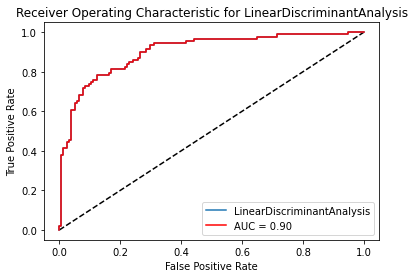

In [47]:
#LinearDiscriminantAnalysis
LDA=LinearDiscriminantAnalysis()

LDA.fit(x_train,y_train)
pred_test=LDA.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for LinearDiscriminantAnalysis :',accuracy_score(y_test,pred_test)*100)
print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

b1=cross_val_score(LDA,x,y,cv=5).mean()*100
b2=cross_val_score(LDA,x,y,cv=5).std()

print('cross_val_score for LinearDiscriminantAnalysis:',b1)
print('Standard Deviation:',b2)

cv_means.append(b1)
cv_std.append(b2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=LDA.predict_proba(x_test)[:,1] 
pred=LDA.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of LinearDiscriminantAnalysis:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LinearDiscriminantAnalysis')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for LinearDiscriminantAnalysis')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[131  23]
 [ 13  79]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       154
           1       0.77      0.86      0.81        92

    accuracy                           0.85       246
   macro avg       0.84      0.85      0.85       246
weighted avg       0.86      0.85      0.85       246

-------------------------------------------------------------------------------------------------------------------
Accuracy score for DecisionTreeClassifier: 85.36585365853658
-------------------------------------------------------------------------------------------------------------------
cross_val_score for DecisionTreeClassifier: 78.29268292682927
Standard Deviatio

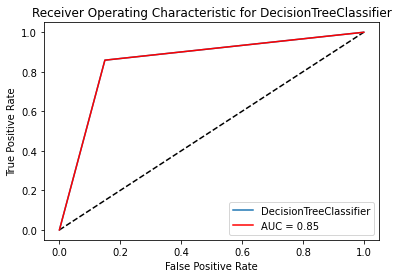

In [48]:
#DecisionTreeClassifier
DTC=DecisionTreeClassifier()

DTC.fit(x_train,y_train)
pred_test=DTC.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for DecisionTreeClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

c1=cross_val_score(DTC,x,y,cv=5).mean()*100
c2=cross_val_score(DTC,x,y,cv=5).std()

print('cross_val_score for DecisionTreeClassifier:',c1)
print('Standard Deviation:',c2)

cv_means.append(c1)
cv_std.append(c2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=DTC.predict_proba(x_test)[:,1] 
pred=DTC.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of DecisionTreeClassifier:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for DecisionTreeClassifier')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[138  16]
 [ 15  77]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       154
           1       0.83      0.84      0.83        92

    accuracy                           0.87       246
   macro avg       0.86      0.87      0.87       246
weighted avg       0.87      0.87      0.87       246

-------------------------------------------------------------------------------------------------------------------
Accuracy score for RandomForestClassifier: 87.39837398373984
-------------------------------------------------------------------------------------------------------------------
cross_val_score for RandomForestClassifier: 83.29268292682926
Standard Deviatio

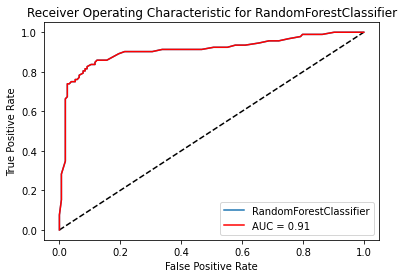

In [49]:
#RandomForestClassifier
RFC=RandomForestClassifier()

RFC.fit(x_train,y_train)
pred_test=RFC.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for RandomForestClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

d1=cross_val_score(RFC,x,y,cv=5).mean()*100
d2=cross_val_score(RFC,x,y,cv=5).std()

print('cross_val_score for RandomForestClassifier:',d1)
print('Standard Deviation:',d2)

cv_means.append(d1)
cv_std.append(d2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=RFC.predict_proba(x_test)[:,1] 
pred=RFC.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of RandomForestClassifier:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for RandomForestClassifier')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[127  27]
 [ 17  75]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       154
           1       0.74      0.82      0.77        92

    accuracy                           0.82       246
   macro avg       0.81      0.82      0.81       246
weighted avg       0.83      0.82      0.82       246

-------------------------------------------------------------------------------------------------------------------
Accuracy score for AdaBoostClassifier: 82.11382113821138
-------------------------------------------------------------------------------------------------------------------
cross_val_score for AdaBoostClassifier: 81.34146341463413
Standard Deviation: 0.025

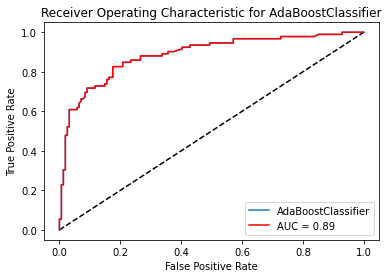

In [50]:
#AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_test=Ada.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for AdaBoostClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

e1=cross_val_score(Ada,x,y,cv=5).mean()*100
e2=cross_val_score(Ada,x,y,cv=5).std()

print('cross_val_score for AdaBoostClassifier:',e1)
print('Standard Deviation:',e2)

cv_means.append(e1)
cv_std.append(e2)


print('-------------------------------------------------------------------------------------------------------------------')
y_prob=Ada.predict_proba(x_test)[:,1] 
pred=Ada.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of AdaBoostClassifier:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for AdaBoostClassifier')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[136  18]
 [ 21  71]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       154
           1       0.80      0.77      0.78        92

    accuracy                           0.84       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.84      0.84      0.84       246

-------------------------------------------------------------------------------------------------------------------
Accuracy score for GradientBoostingClassifier: 84.14634146341463
-------------------------------------------------------------------------------------------------------------------
cross_val_score for GradientBoostingClassifier: 81.82926829268294
Standard 

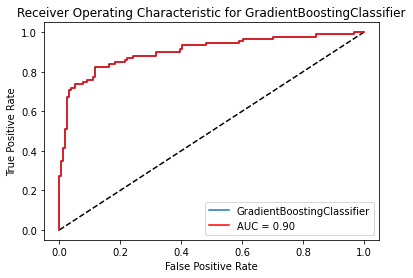

In [51]:
#GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_test=GBC.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for GradientBoostingClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

f1=cross_val_score(GBC,x,y,cv=5).mean()*100
f2=cross_val_score(GBC,x,y,cv=5).std()

print('cross_val_score for GradientBoostingClassifier:',f1)
print('Standard Deviation:',f2)

cv_means.append(f1)
cv_std.append(f2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=GBC.predict_proba(x_test)[:,1] 
pred=GBC.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of GradientBoostingClassifier:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for GradientBoostingClassifier')
plt.show()

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[137  17]
 [ 17  75]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       154
           1       0.82      0.82      0.82        92

    accuracy                           0.86       246
   macro avg       0.85      0.85      0.85       246
weighted avg       0.86      0.86      0.86       246

-------------------------------------------------------------------------------------------------------------------
Accuracy score for ExtraTreesClassifier: 86.1788617886179
-------------------------------------------------------------------------------------------------------------------
cross_val_score for ExtraTreesClassifier: 80.3658536585366
Standard Deviation: 0.0

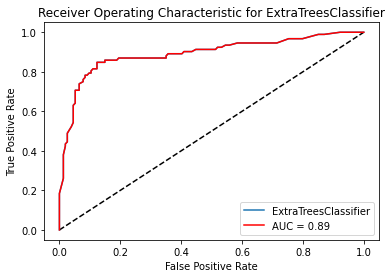

In [52]:
#ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_test=ETC.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for ExtraTreesClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

g1=cross_val_score(ETC,x,y,cv=5).mean()*100
g2=cross_val_score(ETC,x,y,cv=5).std()

print('cross_val_score for ExtraTreesClassifier:',g1)
print('Standard Deviation:',g2)

cv_means.append(g1)
cv_std.append(g2)


print('-------------------------------------------------------------------------------------------------------------------')
y_prob=ETC.predict_proba(x_test)[:,1] 
pred=ETC.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of ExtraTreesClassifier:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for ExtraTreesClassifier')
plt.show()

In [53]:
#SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_test=svc.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for SVC:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

h1=cross_val_score(svc,x,y,cv=5).mean()*100
h2=cross_val_score(svc,x,y,cv=5).std()

print('cross_val_score for SVC:',h1)
      
print('Standard Deviation:',h2)

cv_means.append(h1)
cv_std.append(h2)



------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[142  12]
 [ 72  20]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.66      0.92      0.77       154
           1       0.62      0.22      0.32        92

    accuracy                           0.66       246
   macro avg       0.64      0.57      0.55       246
weighted avg       0.65      0.66      0.60       246

-------------------------------------------------------------------------------------------------------------------
Accuracy score for SVC: 65.85365853658537
-------------------------------------------------------------------------------------------------------------------
cross_val_score for SVC: 65.48780487804878
Standard Deviation: 0.02823374854339079


------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[123  31]
 [ 40  52]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       154
           1       0.63      0.57      0.59        92

    accuracy                           0.71       246
   macro avg       0.69      0.68      0.69       246
weighted avg       0.71      0.71      0.71       246

-------------------------------------------------------------------------------------------------------------------
Accuracy score for KNeighborsClassifier: 71.13821138211382
-------------------------------------------------------------------------------------------------------------------
cross_val_score for KNeighborsClassifier: 61.951219512195124
Standard Deviation: 

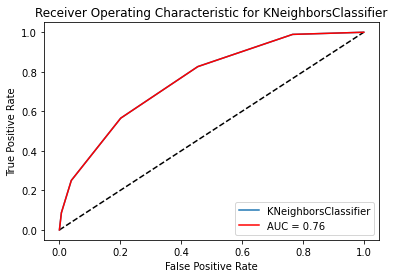

In [54]:
#KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_test=KNN.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for KNeighborsClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

i1=cross_val_score(KNN,x,y,cv=5).mean()*100
i2=cross_val_score(KNN,x,y,cv=5).std()

print('cross_val_score for KNeighborsClassifier:',i1)
print('Standard Deviation:',i2)

cv_means.append(i1)
cv_std.append(i2)

print('-------------------------------------------------------------------------------------------------------------------')
y_prob=KNN.predict_proba(x_test)[:,1] 
pred=KNN.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of KNeighborsClassifier:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for KNeighborsClassifier')
plt.show()

In [55]:
#SGDClassifier
SGD=SGDClassifier()
SGD.fit(x_train,y_train)
pred_test=SGD.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for SGDClassifier:',accuracy_score(y_test,pred_test)*100)

print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

j1=cross_val_score(SGD,x,y,cv=5).mean()*100
j2=cross_val_score(SGD,x,y,cv=5).std()

print('cross_val_score forSGDClassifier:',j1)
print('Standard Deviation:',j2)

cv_means.append(j1)
cv_std.append(j2)



------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[151   3]
 [ 74  18]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.98      0.80       154
           1       0.86      0.20      0.32        92

    accuracy                           0.69       246
   macro avg       0.76      0.59      0.56       246
weighted avg       0.74      0.69      0.62       246

-------------------------------------------------------------------------------------------------------------------
Accuracy score for SGDClassifier: 68.69918699186992
-------------------------------------------------------------------------------------------------------------------
cross_val_score forSGDClassifier: 54.87804878048781
Standard Deviation: 0.09783498107381

------------------------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[133  21]
 [ 19  73]]
-------------------------------------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       154
           1       0.78      0.79      0.78        92

    accuracy                           0.84       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.84      0.84      0.84       246

-------------------------------------------------------------------------------------------------------------------
Accuracy score for LogisticRegression : 83.73983739837398
-------------------------------------------------------------------------------------------------------------------
cross_val_score for LogisticRegression: 78.17073170731709
Standard Deviation: 0.00

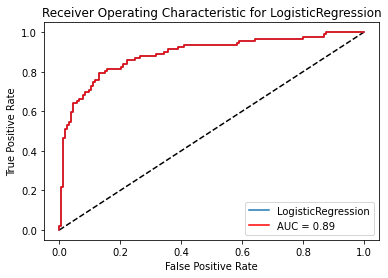

In [56]:
#LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print('------------------------------------------------------------------------------------------------------------------')
# Summary of the predictions made by the classifier

print('Confusion Matrix :','\n',confusion_matrix(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification report :','\n',classification_report(y_test,pred_test))
print('-------------------------------------------------------------------------------------------------------------------')
# Accuracy score
print('Accuracy score for LogisticRegression :',accuracy_score(y_test,pred_test)*100)
print('-------------------------------------------------------------------------------------------------------------------')

#Cross validation score

k1=cross_val_score(lr,x,y,cv=5).mean()*100
k2=cross_val_score(lr,x,y,cv=5).std()

print('cross_val_score for LogisticRegression:',k1)
print('Standard Deviation:',k2)

cv_means.append(k1)
cv_std.append(k2)


print('-------------------------------------------------------------------------------------------------------------------')
y_prob=lr.predict_proba(x_test)[:,1] 
pred=lr.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of LogisticRegression:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for LogisticRegression')
plt.show()

In [57]:
cv_means

[77.07317073170732,
 79.6341463414634,
 78.29268292682927,
 83.29268292682926,
 81.34146341463413,
 81.82926829268294,
 80.3658536585366,
 65.48780487804878,
 61.951219512195124,
 54.87804878048781,
 78.17073170731709]

In [58]:
cv_std

[0.0412836850727092,
 0.012555646513398792,
 0.024511891758831415,
 0.024511891758831415,
 0.02517044809823204,
 0.02517044809823204,
 0.017672410666084642,
 0.02823374854339079,
 0.02796913400287738,
 0.0978349810738126,
 0.0071109169449333]

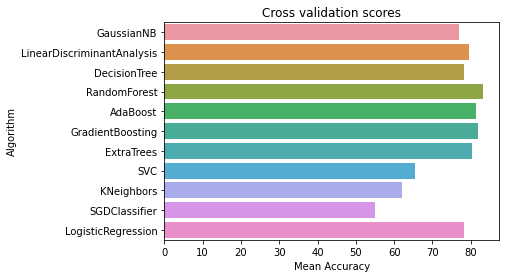

In [59]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["GaussianNB", "LinearDiscriminantAnalysis","DecisionTree","RandomForest","AdaBoost",
                                    "GradientBoosting","ExtraTrees","SVC", "KNeighbors", "SGDClassifier",
                                     "LogisticRegression"]})
                           
                                                      

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [60]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,77.073171,0.041284,GaussianNB
1,79.634146,0.012556,LinearDiscriminantAnalysis
2,78.292683,0.024512,DecisionTree
3,83.292683,0.024512,RandomForest
4,81.341463,0.025170,AdaBoost
5,81.829268,0.025170,GradientBoosting
6,80.365854,0.017672,ExtraTrees
7,65.487805,0.028234,SVC
8,61.951220,0.027969,KNeighbors
9,54.878049,0.097835,SGDClassifier


In [61]:
##importing library
from sklearn.model_selection import GridSearchCV


# RFC Parameters tunning 

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

#Create new RFC object
RFC_2 = RandomForestClassifier()

#Use GridSearch
GCV = GridSearchCV(RFC_2 , rf_param_grid, cv=5, scoring='accuracy')

#Fit the model
best_model = GCV.fit(x,y)

#checking for best parameters
GCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [62]:
#Creating Final Model after hyperparameter tuning for Random forest

f_mod_RFC= RandomForestClassifier(criterion='gini',max_depth=None,max_features=1,
                                  min_samples_leaf=1,min_samples_split=10,n_estimators=300)
f_mod_RFC.fit(x_train, y_train)

y_pred = f_mod_RFC.predict(x_test)

# Summary of the predictions made by the classifier
print('classification_report','\n',classification_report(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
print('Confusion matrix','\n',confusion_matrix(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print('Accuracy score for RandomForestClassifier is :',accuracy_score(y_pred,y_test))
print('-------------------------------------------------------------------------------------------------------------------')
scores = cross_val_score(f_mod_RFC, x, y, cv =5)
print('-------------------------------------------------------------------------------------------------------------------')

print('Model accuracy: ',np.mean(scores)*100)

classification_report 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       154
           1       0.83      0.82      0.82        92

    accuracy                           0.87       246
   macro avg       0.86      0.86      0.86       246
weighted avg       0.87      0.87      0.87       246

-------------------------------------------------------------------------------------------------------------------
Confusion matrix 
 [[139  15]
 [ 17  75]]
-------------------------------------------------------------------------------------------------------------------
Accuracy score for RandomForestClassifier is : 0.8699186991869918
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
Model accuracy:  81.46341463414635


In [63]:
# Gradient boosting Parameters tunning 


gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

#Create new GBC object
GBC_2 = GradientBoostingClassifier()

#Use GridSearch
GCV = GridSearchCV(GBC_2, gb_param_grid, cv=5, scoring='accuracy')

#Fit the model
best_model = GCV.fit(x,y)

#checking for best parameters
GCV.best_params_

{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': 0.1,
 'min_samples_leaf': 100,
 'n_estimators': 300}

In [64]:
#Creating Final Model after hyperparameter tuning for Gradient boosting 

f_mod_GBC= GradientBoostingClassifier(learning_rate=0.1,loss='deviance',max_depth=8,max_features=0.1,
                                     min_samples_leaf=100,n_estimators=300)
f_mod_GBC.fit(x_train, y_train)

y_pred = f_mod_GBC.predict(x_test)

# Summary of the predictions made by the classifier
print('classification_report','\n',classification_report(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
print('Confusion matrix','\n',confusion_matrix(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print('Accuracy score for GradientBoostingClassifier is :',accuracy_score(y_pred,y_test))
print('-------------------------------------------------------------------------------------------------------------------')
scores = cross_val_score(f_mod_GBC, x, y, cv =5)
print('-------------------------------------------------------------------------------------------------------------------')

print('Model accuracy: ',np.mean(scores)*100)

classification_report 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       154
           1       0.75      0.79      0.77        92

    accuracy                           0.83       246
   macro avg       0.81      0.82      0.82       246
weighted avg       0.83      0.83      0.83       246

-------------------------------------------------------------------------------------------------------------------
Confusion matrix 
 [[130  24]
 [ 19  73]]
-------------------------------------------------------------------------------------------------------------------
Accuracy score for GradientBoostingClassifier is : 0.8252032520325203
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
Model accuracy:  81.34146341463413


In [65]:
#ExtraTrees 

ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

#Create new GBC object
ETC_2 = ExtraTreesClassifier()

#Use GridSearch
GCV = GridSearchCV(ETC_2, ex_param_grid, cv=5, scoring='accuracy')

#Fit the model
best_model = GCV.fit(x,y)

#checking for best parameters
GCV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [66]:
#Creating Final Model after hyperparameter tuning for ExtraTreesClassifier

f_mod_ETC= ExtraTreesClassifier(max_depth=None,max_features=1,min_samples_split=3,
                                min_samples_leaf=1,n_estimators=300,criterion='gini')
f_mod_ETC.fit(x_train, y_train)

y_pred = f_mod_ETC.predict(x_test)

# Summary of the predictions made by the classifier
print('classification_report','\n',classification_report(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
print('Confusion matrix','\n',confusion_matrix(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print('Accuracy score for ExtraTreesClassifier is :',accuracy_score(y_pred,y_test))
print('-------------------------------------------------------------------------------------------------------------------')
scores = cross_val_score(f_mod_ETC, x, y, cv =5)
print('-------------------------------------------------------------------------------------------------------------------')

print('Model accuracy: ',np.mean(scores)*100)

classification_report 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       154
           1       0.82      0.82      0.82        92

    accuracy                           0.86       246
   macro avg       0.85      0.85      0.85       246
weighted avg       0.86      0.86      0.86       246

-------------------------------------------------------------------------------------------------------------------
Confusion matrix 
 [[137  17]
 [ 17  75]]
-------------------------------------------------------------------------------------------------------------------
Accuracy score for ExtraTreesClassifier is : 0.8617886178861789
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
Model accuracy:  81.09756097560975


In [67]:
# Adaboost parameter tuning

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                  "base_estimator__splitter" :   ["best", "random"],
                  "algorithm" : ["SAMME","SAMME.R"],
                  "n_estimators" :[1,2],
                  "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

#Create new Ada object

adaDTC = AdaBoostClassifier(DTC, random_state=43)

#Use GridSearch
clf= GridSearchCV(adaDTC, ada_param_grid, cv=5, scoring='accuracy')

#Fit the model
best_model = clf.fit(x,y)

#checking for best parameters
clf.best_params_

{'algorithm': 'SAMME',
 'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'learning_rate': 0.0001,
 'n_estimators': 1}

In [68]:
#Creating Final Model after hyperparameter tuning for AdaBoostClassifier

f_mod_ada= AdaBoostClassifier(algorithm='SAMME',n_estimators=1,learning_rate=0.0001)
f_mod_ada.fit(x_train, y_train)

y_pred = f_mod_ada.predict(x_test)

# Summary of the predictions made by the classifier
print('classification_report','\n',classification_report(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
print('Confusion matrix','\n',confusion_matrix(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print('Accuracy score for AdaBoostClassifier is :',accuracy_score(y_pred,y_test))
print('-------------------------------------------------------------------------------------------------------------------')
scores = cross_val_score(f_mod_ada, x, y, cv =5)
print('-------------------------------------------------------------------------------------------------------------------')

print('Model accuracy: ',np.mean(scores)*100)

classification_report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       154
           1       0.76      0.77      0.77        92

    accuracy                           0.83       246
   macro avg       0.81      0.81      0.81       246
weighted avg       0.83      0.83      0.83       246

-------------------------------------------------------------------------------------------------------------------
Confusion matrix 
 [[132  22]
 [ 21  71]]
-------------------------------------------------------------------------------------------------------------------
Accuracy score for AdaBoostClassifier is : 0.8252032520325203
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
Model accuracy:  79.14634146341464


In [69]:
#saving the model for deployment to client

import joblib

joblib.dump(f_mod_RFC,'Titanic_survival_pred_rfc.obj')

['Titanic_survival_pred_rfc.obj']